In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## EDA

The dataset has 1174 rows and 59 columns.
Food Name                                object
Category Name                            object
Calcium                                 float64
Calories                                float64
Carbs                                   float64
Cholesterol                             float64
Copper                                  float64
Fats                                    float64
Fiber                                   float64
Folate                                  float64
Iron                                    float64
Magnesium                               float64
Monounsaturated Fat                     float64
Net carbs                               float64
Omega-3 - DHA                           float64
Omega-3 - DPA                           float64
Omega-3 - EPA                           float64
Phosphorus                              float64
Polyunsaturated fat                     float64
Potassium                               float6

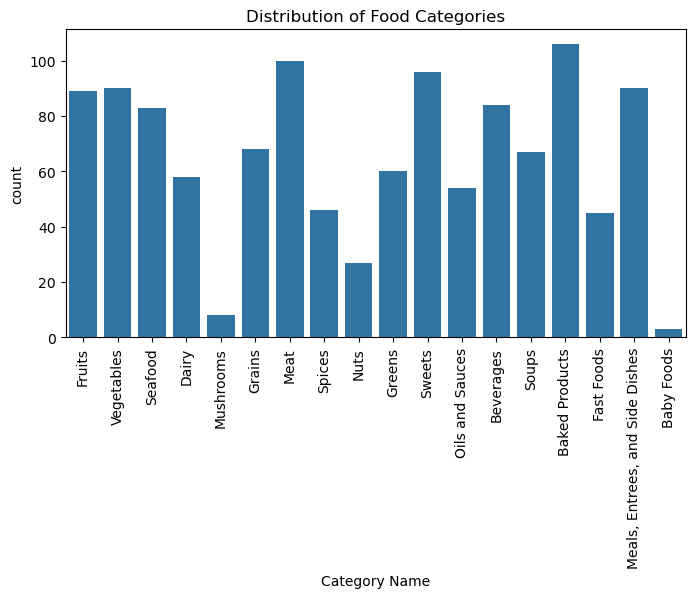

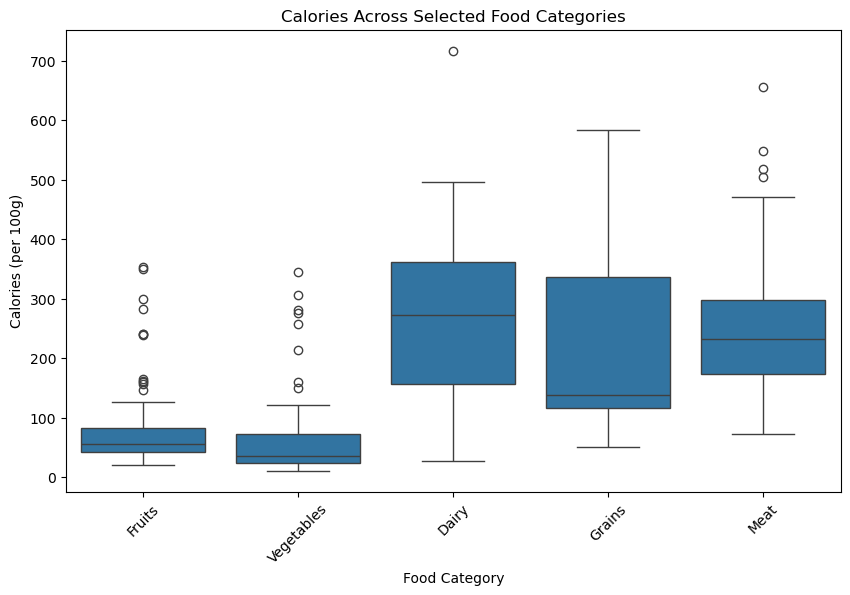

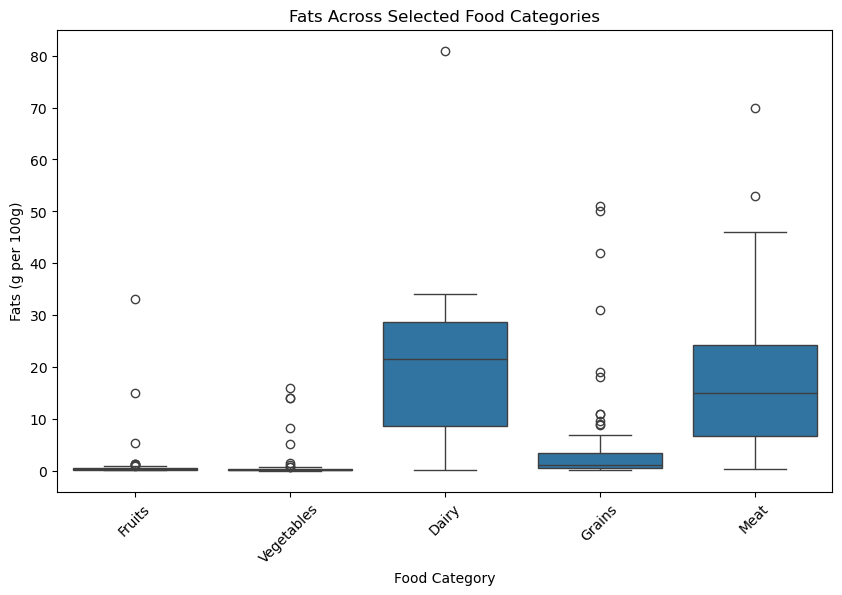

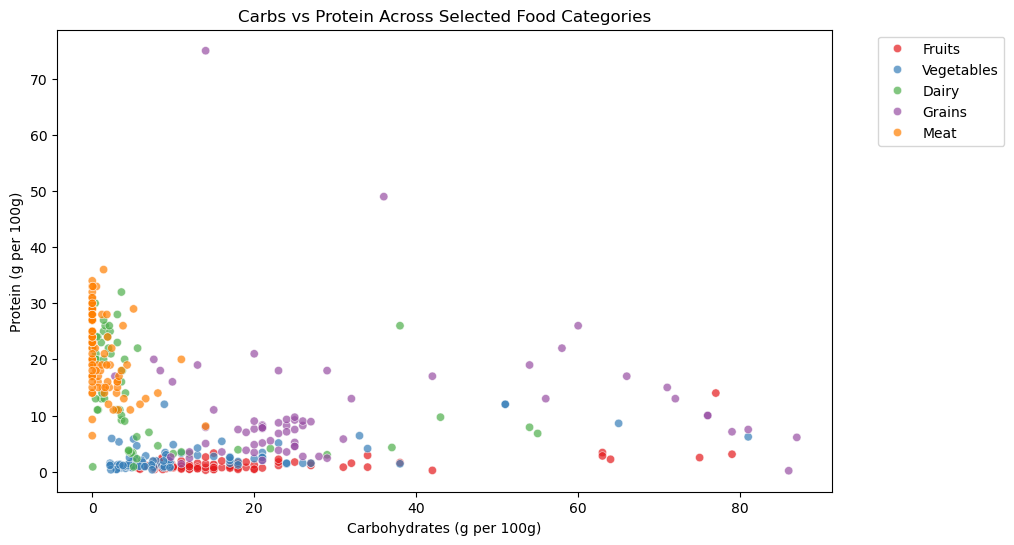

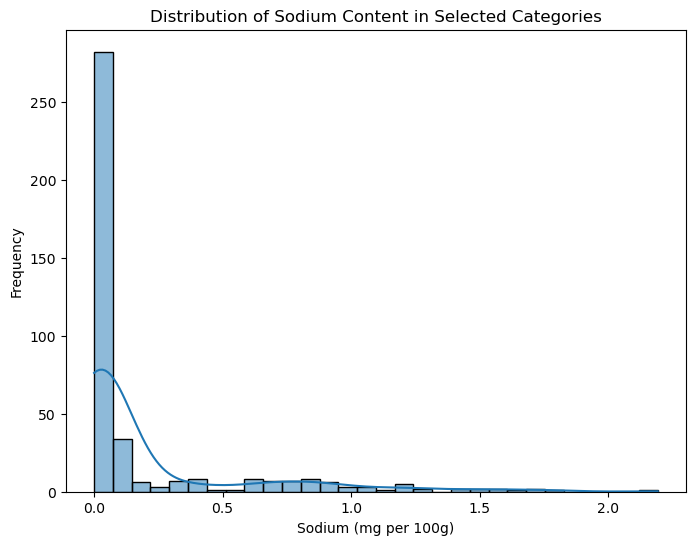

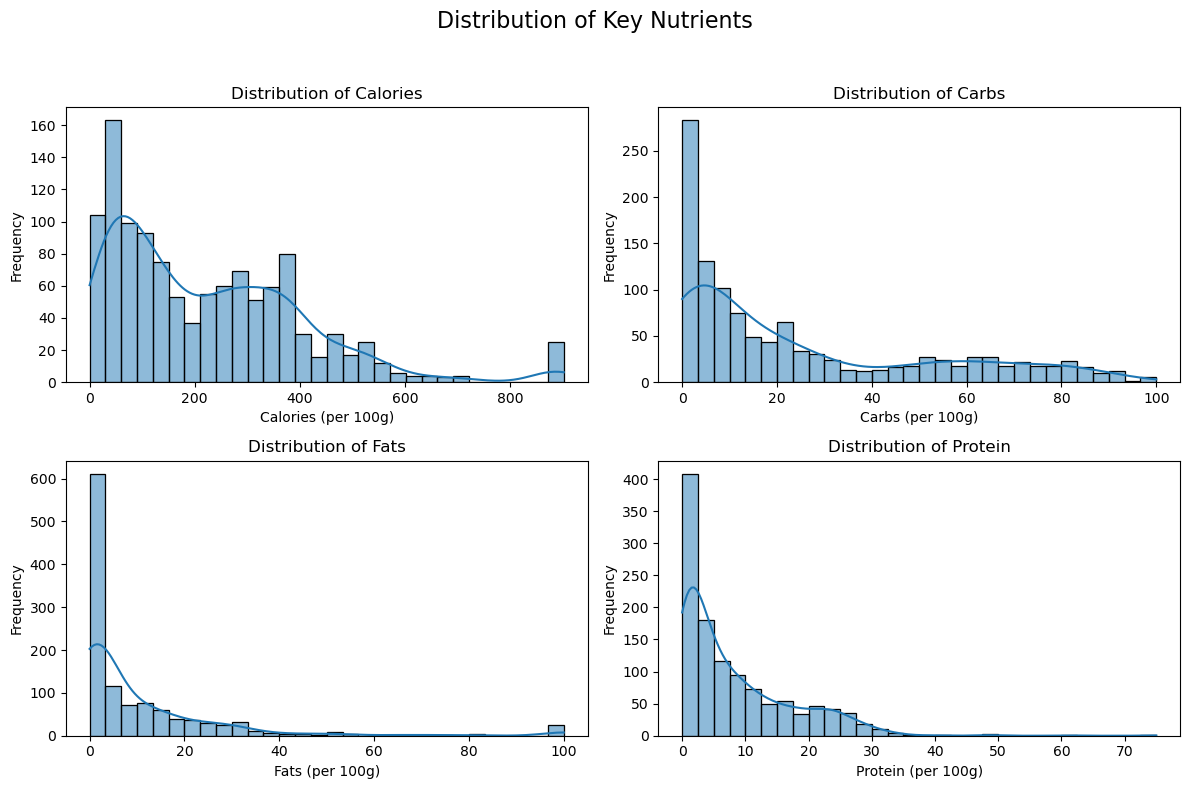


Top 10 categories by average Protein content:
                                    Protein
Category Name                             
Seafood                          21.707229
Meat                             21.548000
Dairy                            14.201724
Nuts                             12.996296
Grains                           10.695000
Fast Foods                       10.574444
Spices                           10.102391
Meals, Entrees, and Side Dishes   8.339778
Baked Products                    7.524528
Baby Foods                        7.400000


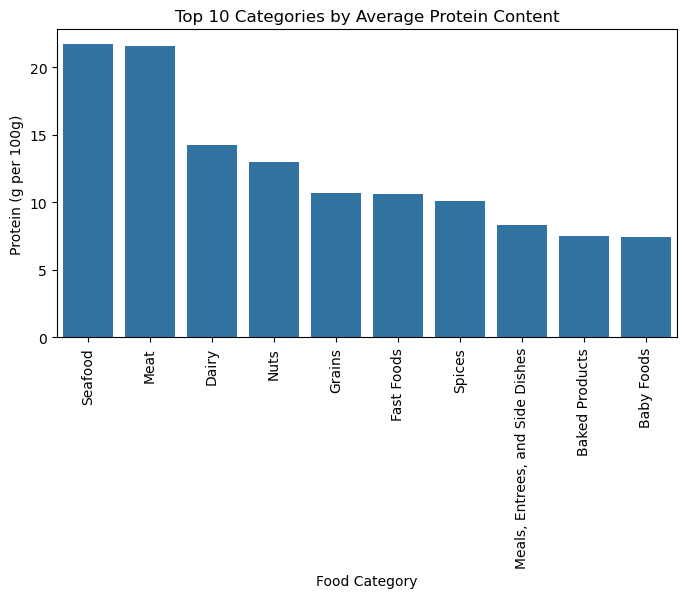

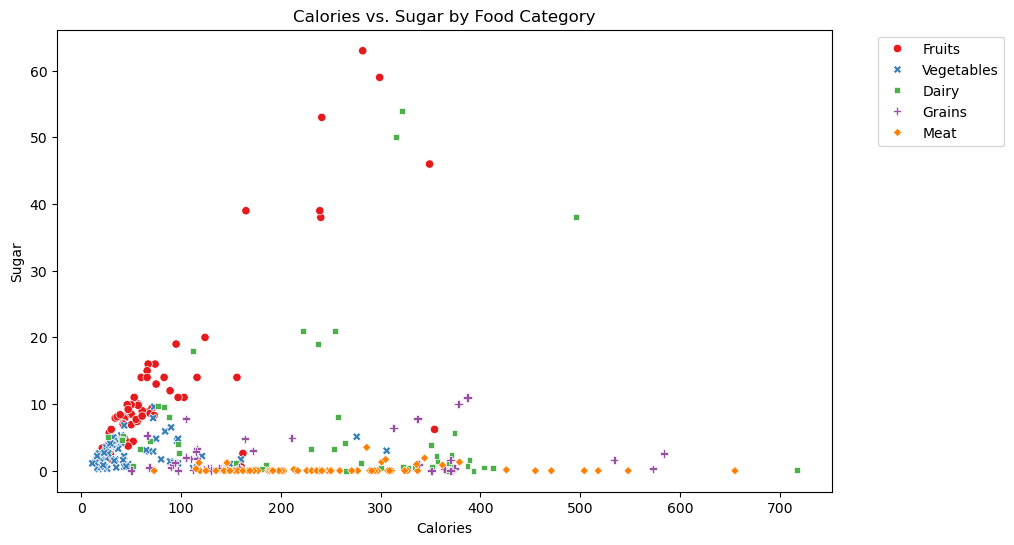

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the figures directory if it doesn't exist
os.makedirs('../figures', exist_ok=True)

# Load the dataset
data = pd.read_csv('../data/foodstruct_nutritional_facts.csv')

# 1. Data Overview
num_rows, num_columns = data.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")
pd.set_option('display.max_rows', None)
print(data.dtypes)

# 2. Check Missing Values
print("\nMissing values per column:")
print(data.isnull().sum())

# 3. Summary of Target Variable (Food Category)
print(data['Category Name'].value_counts())
print(data['Category Name'].describe())

# Visualize distribution of the target variable (Category Name)
plt.figure(figsize=(8, 4))
sns.countplot(x='Category Name', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Food Categories')
plt.savefig('../figures/distribution_of_food_categories.png', dpi=300)
plt.show()

# 4. Filter the dataset to focus on specific food categories
categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]

# Boxplot: Calories across selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category Name', y='Calories', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Calories Across Selected Food Categories')
plt.xlabel('Food Category')
plt.ylabel('Calories (per 100g)')
plt.savefig('../figures/boxplot_calories_across_categories.png', dpi=300)
plt.show()

# Boxplot: Fats across selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category Name', y='Fats', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Fats Across Selected Food Categories')
plt.xlabel('Food Category')
plt.ylabel('Fats (g per 100g)')
plt.savefig('../figures/boxplot_fats_across_categories.png', dpi=300)
plt.show()

# Scatterplot: Carbs vs Protein for selected categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Carbs', y='Protein', hue='Category Name', data=filtered_data, palette='Set1', alpha=0.7)
plt.title('Carbs vs Protein Across Selected Food Categories')
plt.xlabel('Carbohydrates (g per 100g)')
plt.ylabel('Protein (g per 100g)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig('../figures/scatterplot_carbs_vs_protein.png', dpi=300)
plt.show()

# Histogram: Sodium content distribution in selected categories
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Sodium'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sodium Content in Selected Categories')
plt.xlabel('Sodium (mg per 100g)')
plt.ylabel('Frequency')
plt.savefig('../figures/histogram_sodium_content.png', dpi=300)
plt.show()

# Distribution of Key Nutrients
key_nutrients = ['Calories', 'Carbs', 'Fats', 'Protein']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
fig.suptitle('Distribution of Key Nutrients', fontsize=16)

axes = axes.flatten()
for i, nutrient in enumerate(key_nutrients):
    sns.histplot(data[nutrient].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {nutrient}')
    axes[i].set_xlabel(f'{nutrient} (per 100g)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.savefig('../figures/distribution_of_key_nutrients.png', dpi=300)
plt.show()

# Top Categories by Nutrient
top_protein_categories = data[['Category Name', 'Protein']].groupby('Category Name').mean().sort_values(by='Protein', ascending=False).head(10)
print("\nTop 10 categories by average Protein content:\n", top_protein_categories)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_protein_categories.index, y=top_protein_categories['Protein'])
plt.xticks(rotation=90)
plt.title('Top 10 Categories by Average Protein Content')
plt.xlabel('Food Category')
plt.ylabel('Protein (g per 100g)')
plt.savefig('../figures/top_10_categories_by_protein_content.png', dpi=300)
plt.show()

# Calories vs. Sugar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Calories', y='Sugar', hue='Category Name', style='Category Name', palette='Set1')
plt.title('Calories vs. Sugar by Food Category')
plt.xlabel('Calories')
plt.ylabel('Sugar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../figures/scatterplot_calories_vs_sugar.png', dpi=300)
plt.show()


## Preprocessing

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('../data/foodstruct_nutritional_facts.csv')

# 1. Split the data
X = data.drop(columns=['Category Name'])  # Features
y = data['Category Name']  # Target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Train set size: {X_train.shape[0]} data points, Test set size: {X_test.shape[0]} data points.")
print(f"Number of features: {X_train.shape[1]} before preprocessing")

# 2. Missing values analysis before preprocessing
missing_values_before = X_train.isnull().sum()
fraction_missing_values = X_train.isnull().mean()


print("\nMissing values in features before preprocessing:")
print(missing_values_before[missing_values_before > 0])


print("\nFraction of missing values per feature:")
print(fraction_missing_values[fraction_missing_values > 0])

# 3. Preprocessing
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = X_train.select_dtypes(exclude=['float64', 'int64']).columns


imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_numeric_imputed = pd.DataFrame(imputer.transform(X_test[numeric_cols]), columns=numeric_cols)


X_train_non_numeric = X_train[non_numeric_cols].copy()
X_test_non_numeric = X_test[non_numeric_cols].copy()

# Scaling the numeric data
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric_imputed), columns=numeric_cols)
X_test_numeric_scaled = pd.DataFrame(scaler.transform(X_test_numeric_imputed), columns=numeric_cols)

# Combine scaled numeric and non-numeric columns back together
X_train_final = pd.concat([X_train_numeric_scaled, X_train_non_numeric.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_numeric_scaled, X_test_non_numeric.reset_index(drop=True)], axis=1)

# 4. After Preprocessing
print("\nNumber of features after preprocessing:", X_train_final.shape[1])

# Check for any remaining missing values after imputation
missing_values_after = X_train_final.isnull().sum()
print("\nMissing values in features after preprocessing (should be zero for numeric features):\n", missing_values_after[missing_values_after > 0])


Train set size: 939 data points, Test set size: 235 data points.
Number of features: 58 before preprocessing

Missing values in features before preprocessing:
Calcium                                  19
Cholesterol                              40
Copper                                   64
Fiber                                    76
Folate                                   79
Iron                                     16
Magnesium                                48
Monounsaturated Fat                      85
Net carbs                                 1
Omega-3 - DHA                           214
Omega-3 - DPA                           219
Omega-3 - EPA                           213
Phosphorus                               37
Polyunsaturated fat                      85
Potassium                                36
Saturated Fat                            62
Selenium                                120
Sodium                                   16
Trans Fat                               436
Vitam

Validation Accuracy: 0.9506172839506173
Validation Classification Report:
              precision    recall  f1-score   support

       Dairy       1.00      0.91      0.95        11
      Fruits       0.94      0.94      0.94        18
      Grains       0.93      1.00      0.97        14
        Meat       1.00      1.00      1.00        20
  Vegetables       0.89      0.89      0.89        18

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Test Accuracy: 0.9382716049382716
Test Classification Report:
              precision    recall  f1-score   support

       Dairy       1.00      1.00      1.00        12
      Fruits       0.86      1.00      0.92        18
      Grains       0.85      0.85      0.85        13
        Meat       1.00      1.00      1.00        20
  Vegetables       1.00      0.83      0.91        18

    accuracy                           0.94      

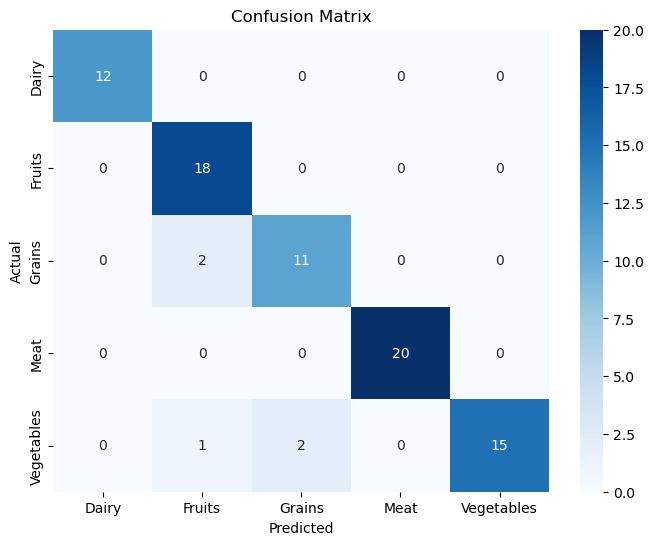

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = pd.read_csv('../data/foodstruct_nutritional_facts.csv')


categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]


X = filtered_data.drop(columns=['Food Name', 'Category Name'])
y = filtered_data['Category Name']


X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)


numeric_cols = X.select_dtypes(include=[np.number]).columns


fully_missing_cols = [col for col in numeric_cols if X_train[col].isnull().all()]
numeric_cols = numeric_cols.difference(fully_missing_cols)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[numeric_cols]), 
                               columns=numeric_cols, index=X_train.index)
X_val_imputed = pd.DataFrame(imputer.transform(X_val[numeric_cols]), 
                             columns=numeric_cols, index=X_val.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test[numeric_cols]), 
                              columns=numeric_cols, index=X_test.index)


for col in fully_missing_cols:
    X_train_imputed[col] = 0
    X_val_imputed[col] = 0
    X_test_imputed[col] = 0


X_train_imputed = X_train_imputed[X.select_dtypes(include=[np.number]).columns]
X_val_imputed = X_val_imputed[X.select_dtypes(include=[np.number]).columns]
X_test_imputed = X_test_imputed[X.select_dtypes(include=[np.number]).columns]


scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), 
                              columns=X_train_imputed.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), 
                            columns=X_val_imputed.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), 
                             columns=X_test_imputed.columns, index=X_test.index)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)


y_val_pred = rf_clf.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = rf_clf.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# logistic regression as baseline, xgboost, 4 total models 
# for each model, experiment with hyperparameters, and find best one 
# do that in grid search cv, 
# create table and put model name, hyperparemeters for each model
# line of accuacies 
# when use xgboost model, impute missing continous variables, for other models use reduced features method
# precision and recall curve 
# baseline in addition to the 4 models 
# baseline score is proportion of true class in dataset - logistic regression
# 3 different hyperparamters for each model 

In [5]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
import os

# Suppress Warnings for Clarity
warnings.filterwarnings('ignore')

# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Load the Dataset
data = pd.read_csv('../data/foodstruct_nutritional_facts.csv')

# Focus on Specific Food Categories
categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]

# Separate Features and Target
X = filtered_data.drop(columns=['Category Name', 'Food Name'])  # Features
y = filtered_data['Category Name']  # Target

# Encode the Target Variable into Numeric Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the Data into Training, Validation, and Test Sets
X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(
    X, y_encoded, test_size=0.4, stratify=y_encoded, random_state=42
)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(
    X_temp, y_temp_encoded, test_size=0.5, stratify=y_temp_encoded, random_state=42
)

# Identify Numeric Columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# ---------------------
# Pipeline for XGBoost
# ---------------------

# Identify Columns with All NaN Values in the Training Set and Drop Them
cols_all_nan = X_train[numeric_cols].columns[X_train[numeric_cols].isna().all()].tolist()

# Update Numeric Columns by Dropping Columns with All NaNs
numeric_cols_xgb = numeric_cols.drop(cols_all_nan)

# Extract Numeric Features for XGBoost
X_train_xgb = X_train[numeric_cols_xgb]
X_val_xgb = X_val[numeric_cols_xgb]
X_test_xgb = X_test[numeric_cols_xgb]

scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_val_xgb_scaled = scaler_xgb.transform(X_val_xgb)
X_test_xgb_scaled = scaler_xgb.transform(X_test_xgb)

# ------------------------------
# Pipeline for Other Models (LR, RF, KNN)
# ------------------------------

# Identify Columns with Any NaN Values in the Training Set and Drop Them
cols_with_nan_train = X_train[numeric_cols].columns[X_train[numeric_cols].isna().any()].tolist()

# Drop Columns with Any NaN Values from Training, Validation, and Test Sets
X_train_reduced = X_train[numeric_cols].drop(columns=cols_with_nan_train)
X_val_reduced = X_val[numeric_cols].drop(columns=cols_with_nan_train)
X_test_reduced = X_test[numeric_cols].drop(columns=cols_with_nan_train)

# Impute Missing Values in Reduced Sets Using Mean Strategy
imputer_reduced = SimpleImputer(strategy='mean')
imputer_reduced.fit(X_train_reduced)  # Fit only on training data

X_train_imputed = pd.DataFrame(
    imputer_reduced.transform(X_train_reduced),
    columns=X_train_reduced.columns,
    index=X_train_reduced.index
)
X_val_imputed = pd.DataFrame(
    imputer_reduced.transform(X_val_reduced),
    columns=X_val_reduced.columns,
    index=X_val_reduced.index
)
X_test_imputed = pd.DataFrame(
    imputer_reduced.transform(X_test_reduced),
    columns=X_test_reduced.columns,
    index=X_test_reduced.index
)

# Feature Scaling for Other Models
scaler_other = StandardScaler()
X_train_scaled = scaler_other.fit_transform(X_train_imputed)
X_val_scaled = scaler_other.transform(X_val_imputed)
X_test_scaled = scaler_other.transform(X_test_imputed)

# ---------------------
# Define Models and Hyperparameters
# ---------------------

models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {'C': [0.1, 1, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    ),
    'XGBoost': (
        XGBClassifier(eval_metric='mlogloss', random_state=42),  
        {'learning_rate': [0.01, 0.1, 0.2]}
    ),
    'KNN': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7]}
    )
}

# ---------------------
# Grid Search and Model Evaluation
# ---------------------

results = {}

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'XGBoost':
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_xgb_scaled, y_train_encoded)
        
        best_model = grid_search.best_estimator_
        
        # XGBoost requires the XGBoost-processed data
        y_val_pred_encoded = best_model.predict(X_val_xgb_scaled)
        y_test_pred_encoded = best_model.predict(X_test_xgb_scaled)
    else:
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train_encoded)
        
        best_model = grid_search.best_estimator_
        
        # Other models use the standard scaled data
        y_val_pred_encoded = best_model.predict(X_val_scaled)
        y_test_pred_encoded = best_model.predict(X_test_scaled)
        
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_model': best_model,
        'validation_accuracy': accuracy_score(y_val_encoded, y_val_pred_encoded),
        'test_accuracy': accuracy_score(y_test_encoded, y_test_pred_encoded)
    }


# ---------------------
# Baseline Model
# ---------------------

baseline_accuracy = np.max(np.bincount(y_test_encoded)) / len(y_test_encoded)
print(f"\nBaseline Accuracy: {baseline_accuracy:.4f}")

# ---------------------
# Save Results Using Pickle
# ---------------------

# Save all results to a pickle file in the 'results' folder
results_path = '../results/model_results.pkl'
with open(results_path, 'wb') as file:
    pickle.dump(results, file)
    
print(f"\nModel results saved to {results_path}.")

# Save label encoder
with open('../results/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
    
print(f"\nLabel encoder saved to ../results/label_encoder.pkl.")

# ---------------------
# Display Model Performance
# ---------------------

print("\nModel Performance:")
for name, res in results.items():
    print(f"{name}:")
    print(f"  Best Parameters: {res['best_params']}")
    print(f"  Validation Accuracy: {res['validation_accuracy']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")



Training Logistic Regression...

Training Random Forest...

Training XGBoost...

Training KNN...

Baseline Accuracy: 0.2469

Model results saved to ../results/model_results.pkl.

Label encoder saved to ../results/label_encoder.pkl.

Model Performance:
Logistic Regression:
  Best Parameters: {'C': 10}
  Validation Accuracy: 0.7407
  Test Accuracy: 0.8148
Random Forest:
  Best Parameters: {'max_depth': None, 'n_estimators': 50}
  Validation Accuracy: 0.7901
  Test Accuracy: 0.8395
XGBoost:
  Best Parameters: {'learning_rate': 0.2}
  Validation Accuracy: 0.9012
  Test Accuracy: 0.9259
KNN:
  Best Parameters: {'n_neighbors': 5}
  Validation Accuracy: 0.6420
  Test Accuracy: 0.8148


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
import os

# Suppress Warnings for Clarity
warnings.filterwarnings('ignore')

# Create the figures directory if it doesn't exist
os.makedirs('../figures', exist_ok=True)

# Load the Dataset
data = pd.read_csv('../data/foodstruct_nutritional_facts.csv')

# Focus on Specific Food Categories
categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]

# Separate Features and Target
X = filtered_data.drop(columns=['Category Name', 'Food Name'])  # Features
y = filtered_data['Category Name']  # Target

# Encode the Target Variable into Numeric Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the Data into Training, Validation, and Test Sets
X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(
    X, y_encoded, test_size=0.4, stratify=y_encoded, random_state=42
)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(
    X_temp, y_temp_encoded, test_size=0.5, stratify=y_temp_encoded, random_state=42
)

# Identify Numeric Columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# ---------------------
# Pipeline for XGBoost
# ---------------------

# Identify Columns with All NaN Values in the Training Set and Drop Them
cols_all_nan = X_train[numeric_cols].columns[X_train[numeric_cols].isna().all()].tolist()

# Update Numeric Columns by Dropping Columns with All NaNs
numeric_cols_xgb = numeric_cols.drop(cols_all_nan)

# Extract Numeric Features for XGBoost
X_train_xgb = X_train[numeric_cols_xgb]
X_val_xgb = X_val[numeric_cols_xgb]
X_test_xgb = X_test[numeric_cols_xgb]

scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_val_xgb_scaled = scaler_xgb.transform(X_val_xgb)
X_test_xgb_scaled = scaler_xgb.transform(X_test_xgb)

# ------------------------------
# Pipeline for Other Models (LR, RF, KNN)
# ------------------------------

# Identify Columns with Any NaN Values in the Training Set and Drop Them
cols_with_nan_train = X_train[numeric_cols].columns[X_train[numeric_cols].isna().any()].tolist()

# Drop Columns with Any NaN Values from Training, Validation, and Test Sets
X_train_reduced = X_train[numeric_cols].drop(columns=cols_with_nan_train)
X_val_reduced = X_val[numeric_cols].drop(columns=cols_with_nan_train)
X_test_reduced = X_test[numeric_cols].drop(columns=cols_with_nan_train)

# Impute Missing Values in Reduced Sets Using Mean Strategy
imputer_reduced = SimpleImputer(strategy='mean')
imputer_reduced.fit(X_train_reduced)  # Fit only on training data

X_train_imputed = pd.DataFrame(
    imputer_reduced.transform(X_train_reduced),
    columns=X_train_reduced.columns,
    index=X_train_reduced.index
)
X_val_imputed = pd.DataFrame(
    imputer_reduced.transform(X_val_reduced),
    columns=X_val_reduced.columns,
    index=X_val_reduced.index
)
X_test_imputed = pd.DataFrame(
    imputer_reduced.transform(X_test_reduced),
    columns=X_test_reduced.columns,
    index=X_test_reduced.index
)

# Feature Scaling for Other Models
scaler_other = StandardScaler()
X_train_scaled = scaler_other.fit_transform(X_train_imputed)
X_val_scaled = scaler_other.transform(X_val_imputed)
X_test_scaled = scaler_other.transform(X_test_imputed)

# ---------------------
# Define Models and Hyperparameters
# ---------------------

models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {'C': [0.01, 0.1, 1, 10]}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
    ),
    'XGBoost': (
        XGBClassifier(eval_metric='mlogloss', random_state=42),
        {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'colsample_bytree': [0.6, 0.8, 1.0]}
    ),
    'KNN': (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']  # Added weights parameter for KNN
        }
    )
}

# ---------------------
# Grid Search and Model Evaluation
# ---------------------

results = {}

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'XGBoost':
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_xgb_scaled, y_train_encoded)
        y_val_pred = grid_search.best_estimator_.predict(X_val_xgb_scaled)
        y_test_pred = grid_search.best_estimator_.predict(X_test_xgb_scaled)
    else:
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train_encoded)
        y_val_pred = grid_search.best_estimator_.predict(X_val_scaled)
        y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)
    
    val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
    
    best_model = grid_search.best_estimator_
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_model': best_model,
        'validation_accuracy': val_accuracy,
        'test_accuracy': test_accuracy
    }

# Print best hyperparameters and accuracy for each model
for name, res in results.items():
    print(f"\n{name}:")
    print(f"  Best Parameters: {res['best_params']}")
    print(f"  Validation Accuracy: {res['validation_accuracy']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")

# ---------------------
# Save Results
# ---------------------
import pickle

with open('../results/model_results.pkl', 'wb') as f:
    pickle.dump(results, f)

print("Results saved to ../results/model_results.pkl")




Training Logistic Regression...

Training Random Forest...

Training XGBoost...

Training KNN...

Logistic Regression:
  Best Parameters: {'C': 10}
  Validation Accuracy: 0.7407
  Test Accuracy: 0.8148

Random Forest:
  Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
  Validation Accuracy: 0.7901
  Test Accuracy: 0.8395

XGBoost:
  Best Parameters: {'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 100}
  Validation Accuracy: 0.9012
  Test Accuracy: 0.9506

KNN:
  Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
  Validation Accuracy: 0.6914
  Test Accuracy: 0.8519
Results saved to ../results/model_results.pkl


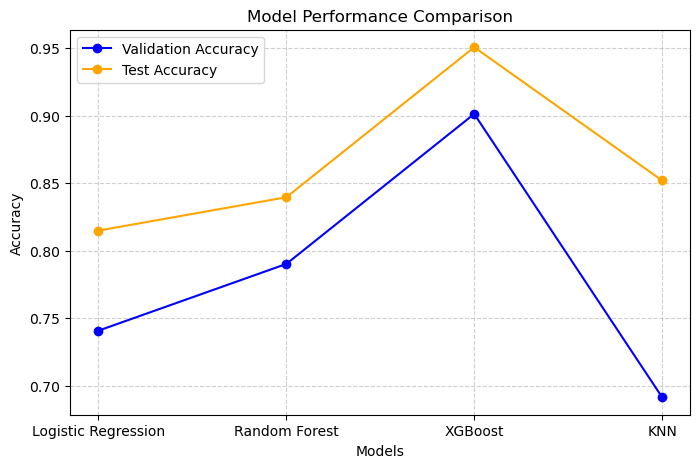

In [29]:
# Plot Code
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'KNN']
val_acc = [0.7407, 0.7901, 0.9012, 0.6914] 
test_acc = [0.8148, 0.8395, 0.9506, 0.8519]  

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.plot(models, val_acc, label='Validation Accuracy', marker='o', color='blue')
plt.plot(models, test_acc, label='Test Accuracy', marker='o', color='orange')

# Add title and axis labels
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')

# Save plot as a PNG image in the figures folder
plt.savefig('../figures/model_comparison.png', dpi=300)

# Add legend, grid, and show the plot
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


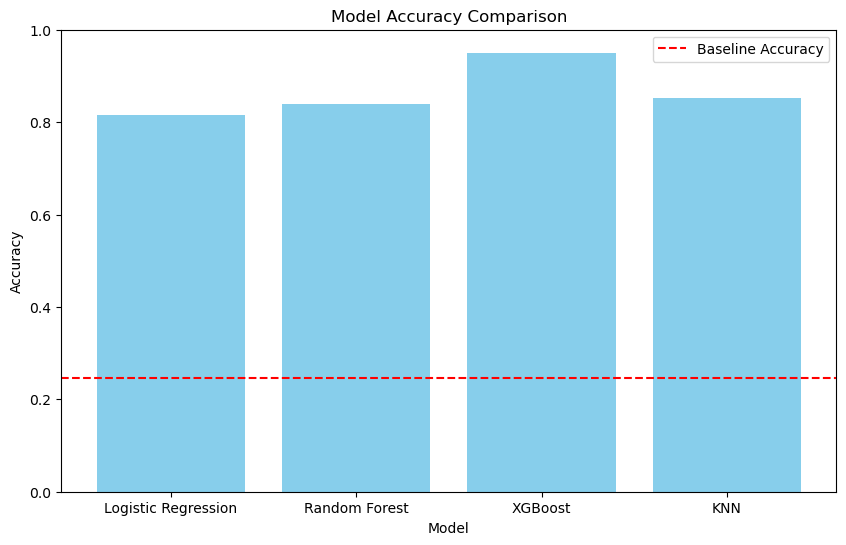

In [30]:
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[name]['test_accuracy'] for name in model_names]
plt.bar(model_names, accuracies, color='skyblue')
plt.axhline(
    y=baseline_accuracy, color='r', linestyle='--', label='Baseline Accuracy'
)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend()
plt.show()

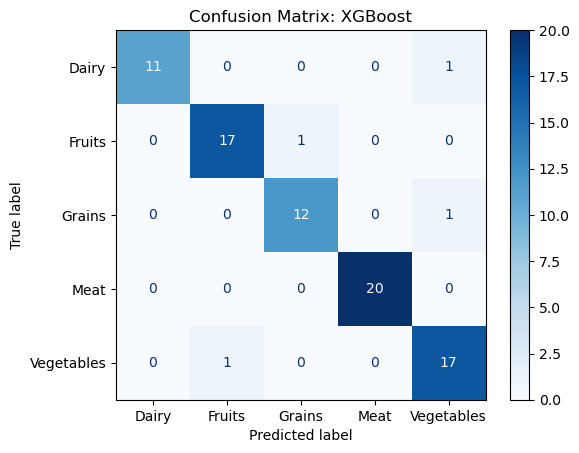

In [31]:
for name, res in results.items():
    if name == 'XGBoost':
        y_pred = res['best_model'].predict(X_test_xgb_scaled)
    
        y_pred = label_encoder.inverse_transform(y_pred)
        y_test_true = label_encoder.inverse_transform(y_test_encoded)
        
        cm = confusion_matrix(y_test_true, y_pred, labels=label_encoder.classes_)
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=label_encoder.classes_
        )
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f"Confusion Matrix: {name}")
        plt.show()


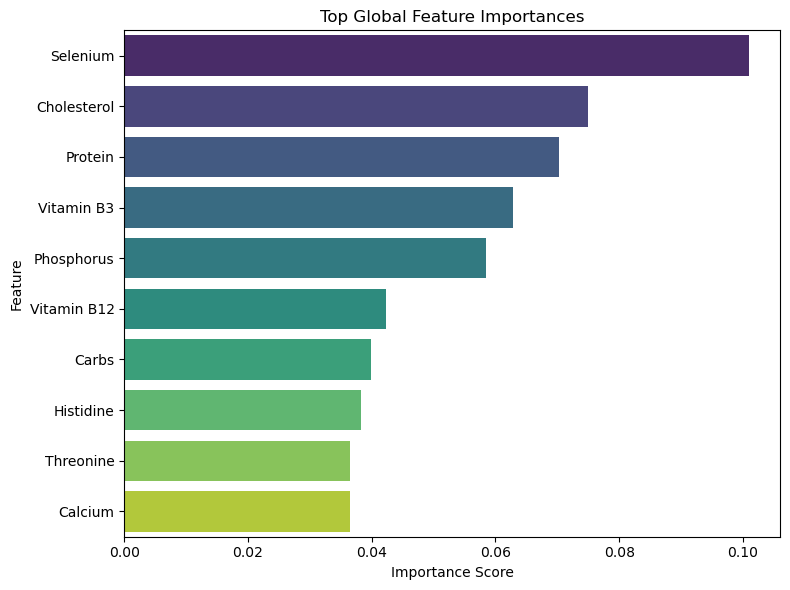

In [32]:
# Extract best model from results
best_xgboost = results.get('XGBoost', {}).get('best_model', None)

if best_xgboost is not None:
    importances = best_xgboost.feature_importances_  # Extract feature importances from XGBoost
    feature_names = numeric_cols_xgb  # Names of the features used for XGBoost
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Top Global Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')

    # Save the plot
    plot_path = '../figures/feature_importance.png'
    plt.savefig(plot_path, dpi=300)
    plt.tight_layout()
    plt.show()
else:
    print("Error: The best XGBoost model is not defined.")



--- Analysis for Index 0 ---

Top 3 Positive Contributors for Index 0:
  Selenium: SHAP Value = 0.82, Feature Value = -0.7438772713092632
  Calories: SHAP Value = 0.82, Feature Value = -0.9444133512909495
  Vitamin C: SHAP Value = 0.46, Feature Value = -0.06315149647979176

Top 3 Negative Contributors for Index 0:
  Saturated Fat: SHAP Value = -0.40, Feature Value = nan
  Potassium: SHAP Value = -0.27, Feature Value = -0.6299322395209561
  Folate: SHAP Value = -0.19, Feature Value = -0.44579496558498377

Generating Force Plot...


<Figure size 2000x800 with 0 Axes>

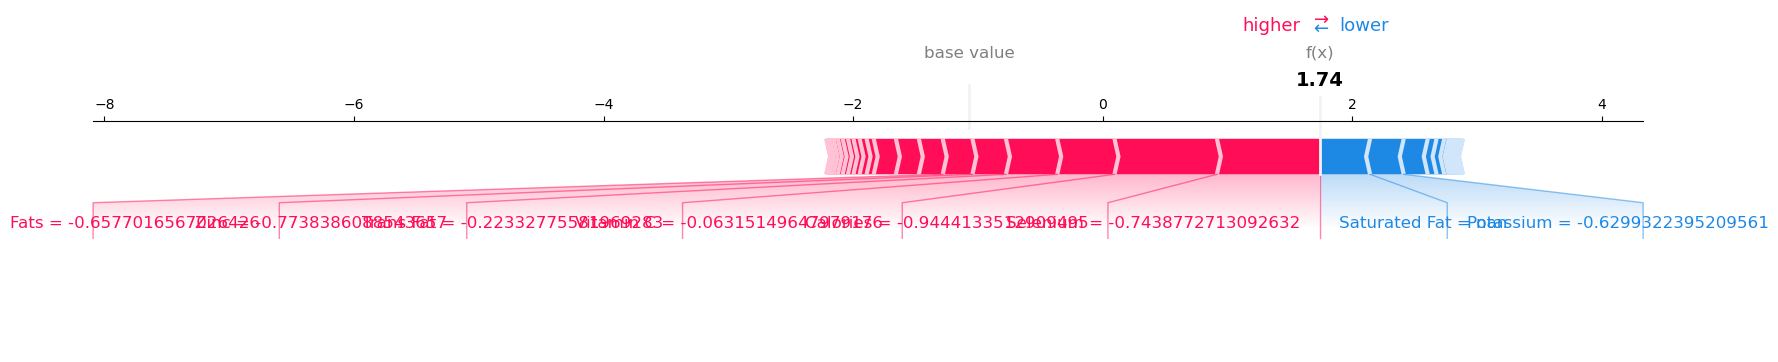

Saved SHAP force plot for index 0 to ../figures/shap_force_plot_index_0.png

--- Analysis for Index 1 ---

Top 3 Positive Contributors for Index 1:
  Sugar: SHAP Value = 1.24, Feature Value = 0.7418108411437364
  Selenium: SHAP Value = 1.08, Feature Value = -0.7889216252117238
  Protein: SHAP Value = 1.03, Feature Value = -0.942061981906921

Top 3 Negative Contributors for Index 1:
  Monounsaturated Fat: SHAP Value = -0.23, Feature Value = -0.6621755863015635
  Fiber: SHAP Value = -0.14, Feature Value = -0.31141603904934
  Fats: SHAP Value = -0.02, Feature Value = -0.6552466538724665

Generating Force Plot...


<Figure size 2000x800 with 0 Axes>

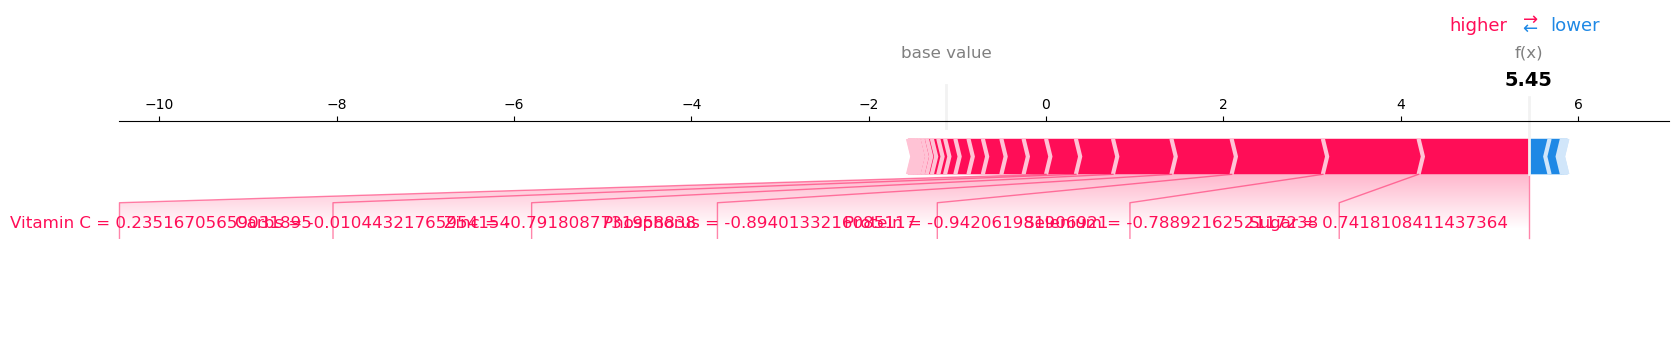

Saved SHAP force plot for index 1 to ../figures/shap_force_plot_index_1.png

--- Analysis for Index 2 ---

Top 3 Positive Contributors for Index 2:
  Manganese: SHAP Value = 1.24, Feature Value = -0.05507935878038238
  Carbs: SHAP Value = 0.73, Feature Value = 0.6262105433210394
  Net carbs: SHAP Value = 0.63, Feature Value = 0.3826897245152755

Top 3 Negative Contributors for Index 2:
  Potassium: SHAP Value = -0.14, Feature Value = 0.4268878368176278
  Saturated Fat: SHAP Value = -0.06, Feature Value = -0.549012752534237
  Copper: SHAP Value = -0.02, Feature Value = 0.17694429698046518

Generating Force Plot...


<Figure size 2000x800 with 0 Axes>

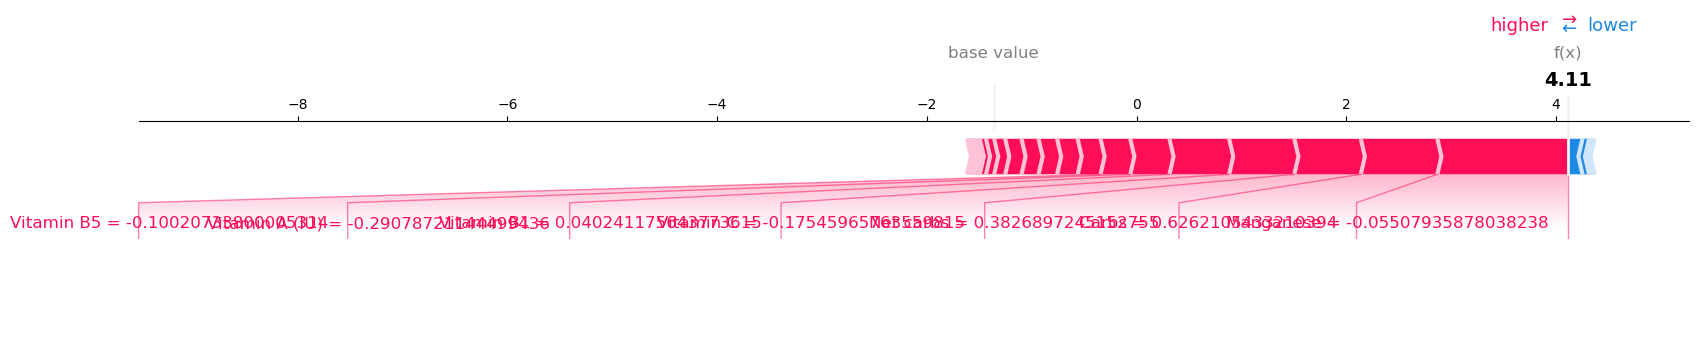

Saved SHAP force plot for index 2 to ../figures/shap_force_plot_index_2.png


In [44]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure the figures directory exists
os.makedirs('../figures', exist_ok=True)

# Assuming `best_xgboost` is your trained XGBoost model and `X_test_xgb` is the test data (before scaling)
df_test = pd.DataFrame(X_test_xgb_scaled, columns=numeric_cols_xgb)

# Create the SHAP explainer and calculate SHAP values
explainer = shap.Explainer(best_xgboost, df_test)
shap_values = explainer(df_test)

# Data points to analyze
indices = [0, 1, 2]  # Adjust indices as needed

# Analyze each index
for idx in indices:
    print(f"\n--- Analysis for Index {idx} ---")
    
    # Get the predicted class index for this data point
    predicted_class_index = best_xgboost.predict_proba(df_test.iloc[[idx]]).argmax(axis=1)[0]
    
    # Extract SHAP values for this specific class and instance
    shap_values_for_idx = shap_values.values[idx][:, predicted_class_index]  
    features = df_test.iloc[idx]  # Feature values for this row
    feature_names = df_test.columns
    
    # Identify positive and negative contributors
    positive_contributors = [
        (feature_names[i], shap_values_for_idx[i], features.iloc[i])
        for i in range(len(shap_values_for_idx)) if shap_values_for_idx[i] > 0
    ]
    negative_contributors = [
        (feature_names[i], shap_values_for_idx[i], features.iloc[i])
        for i in range(len(shap_values_for_idx)) if shap_values_for_idx[i] < 0
    ]

    # Sort and select the top 3 contributors
    positive_contributors = sorted(positive_contributors, key=lambda x: x[1], reverse=True)[:3]
    negative_contributors = sorted(negative_contributors, key=lambda x: x[1])[:3]
    
    # Print positive contributors
    print(f"\nTop 3 Positive Contributors for Index {idx}:")
    for feature, shap_value, feature_value in positive_contributors:
        print(f"  {feature}: SHAP Value = {shap_value:.2f}, Feature Value = {feature_value}")
    
    # Print negative contributors
    print(f"\nTop 3 Negative Contributors for Index {idx}:")
    for feature, shap_value, feature_value in negative_contributors:
        print(f"  {feature}: SHAP Value = {shap_value:.2f}, Feature Value = {feature_value}")
    
    # Generate the force plot with larger figure size
    print("\nGenerating Force Plot...")
    plt.figure(figsize=(20, 8))  # Increased figure size
    force_plot = shap.force_plot(
        base_value=shap_values.base_values[idx][predicted_class_index],  # Base value for this class
        shap_values=shap_values_for_idx,  # SHAP values for this specific class
        features=features,  # Feature values for this instance
        feature_names=feature_names,  # Names of features
        matplotlib=True
    )

    # Save the force plot to the figures folder
    plot_path = f'../figures/shap_force_plot_index_{idx}.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')  # Save as PNG
    plt.close()  # Clear the figure
    print(f"Saved SHAP force plot for index {idx} to {plot_path}")
